In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name:str
    age:str
    result:str

In [2]:
def node1(state:AgentState) -> AgentState:
    """This node will be used to print the name"""
    state['result']=f"Hi {state['name']} I hope you will be consistent!"
    return state

def node2(state:AgentState) -> AgentState:
    """This node will be used to print the age of the person"""
    state['result']=f"Your age is {state['age']} years old!"
    return state

In [5]:
graph=StateGraph(AgentState)
graph.add_node("Nameprinter",node1)
graph.add_node("Ageprinter",node2)
graph.add_edge("Nameprinter", "Ageprinter")
graph.set_entry_point("Nameprinter")
graph.set_finish_point("Ageprinter")

app=graph.compile()

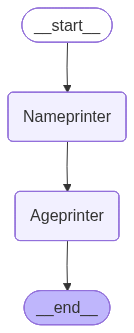

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
results=app.invoke({"name":"Inder","age":"21"})

In [16]:
results['result']

'Your age is 21 years old!'